# The Epileptologie Database

We are going to start this series of tutorials mostly working with a small dataset. Below is a good description of the data by one of the papers who has previously used this dataset<sup>1</sup>:

> "*Five sets (denoted  A–E) each containing  100  single-channel EEG segments of 23.6-sec duration, were composed for the study. These segments were selected and cut out from continuous multichannel EEG recordings after visual inspection  for  artifacts,  e.g.,  due  to  muscle  activity  or  eye  movements. In addition, the segments had to fulfill a stationarity criterion described in detail in Sec. II B. Sets A and B consisted  of  segments  taken  from  surface  EEG  recordings  that were carried out on five healthy volunteers using a standardized  electrode  placement  scheme. Volunteers were relaxed in an awake state with eyes open (A) and eyes closed (B) respectively. Sets C, D, and E originated from our EEG archive of presurgical diagnosis. For the present study EEGs  from  five  patients  were  selected,  all  of  whom  had achieved  complete  seizure  control  after  resection  of  one  of the  hippocampal  formations,  which  was  therefore  correctly diagnosed to be the epileptogenic zone. Segments in set D were recorded from within the epileptogenic zone, and  those  in  set  C  from  the  hippocampal  formation  of  the opposite hemisphere of the brain. While sets C and D contained  only  activity  measured  during  seizure  free  intervals, set  E  only  contained  seizure  activity.  Here  segments  were selected from all recording sites exhibiting ictal activity. All   EEG   signals   were   recorded   with   the   same   128-channel  amplifier  system,  using  an  average  common  reference [omitting electrodes containing pathological activity (C, D, and E) or strong eye movement artifacts (A and B)]. After 12  bit  analog-to-digital  conversion,  the  data  were  written continuously  onto  the  disk  of  a  data  acquisition  computer system  at  a  sampling  rate  of  173.61  Hz.  Band-pass  filter settings were 0.53– 40 Hz (12 dB/oct.).*"

If you do not have a background in EEG research you may be unfamiliar with some of the terms used above. Lets break some of it down...

**[INSERT DESCRIPTION]**


Below are other published papers that use this the dataset:
- Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907,
- Subasi, A., Kevric, J., & Abdullah Canbaz, M. (2017). Epileptic seizure detection using hybrid machine learning methods. Neural Computing and Applications, 1–9. https://doi.org/10.1007/s00521-017-3003-y

---

1. Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907

## Download

I have made some code so that if these directories do not exist then they will be created and the data needed downloaded and unzipped. Don't worry about understanding the specifics of what the code is actually doing here as the focus of this tutorial is the data itself and not web scraping.

However you can of course manually set this up.  In the Epileptologie Database there are the folders with the data inside - unzip the folders found at http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3. Just make sure the structure goes...

> ...\Epileptologie Database\F
>
> ...\Epileptologie Database\N
>
> ...\Epileptologie Database\O
>
> ...\Epileptologie Database\S
>
> ...\Epileptologie Database\Z

**NOTES**

- Although refered to as sets A-E in the paper, when downloading them they are given the letters Z, O, N, F, and S respectively.
- This is really quick to download!

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=232017a12867e9ed64c906e938d3051beac06282751a00a24cda62bb7231cccc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import sys
import os
from bs4 import BeautifulSoup
import requests
import re
import wget
import zipfile


def find_files(url):
    # get a soup of the directory url
    soup = BeautifulSoup(requests.get(url).text, features="html.parser")

    # make a list of all the links in the url
    hrefs_list = []
    for link in soup.find_all('a'):
        hrefs_list.append(link.get('href'))

    return hrefs_list


def download_file(download_file_url, file_dir, output=False):
    if output:
        # print it is downloading
        print('Downloading: '+ download_file_url)
    # download the file to the directory
    wget.download(download_file_url, file_dir)


# needs a directory to download it to
def download_epileptologie(DIR, output=False):

    # directory url
    front_url = 'http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3'
    dir_url = 'http://epileptologie-bonn.de/cms'

    hrefs_dir_list = find_files(front_url)

    # for each link in the directory
    for link in hrefs_dir_list:
        # download the files outside of participant folders we want
        if re.findall('zip', str(link)):
            # if the file doesnt already exist in the directory
            if not os.path.exists(os.path.join(DIR, link)):
                download_file(dir_url+'/'+str(link), DIR, output)
                zip_file_name = link.split('/')[-1]
                zip_ref = zipfile.ZipFile(os.path.join(DIR, zip_file_name), 'r')
                zip_ref.extractall(os.path.join(DIR, zip_file_name[0]))
                zip_ref.close()
                os.remove(os.path.join(DIR, zip_file_name))

In [5]:
DOWNLOAD_DIR = "Epileptologie Database"

if not os.path.exists(DOWNLOAD_DIR):
  os.makedirs(DOWNLOAD_DIR)
  download_epileptologie(DOWNLOAD_DIR, output=True)

else:
  print("Already Downloaded")

Already Downloaded


## Load Data

Lets have a look at intercranial EEG activity, recorded from within the "*epileptogenic zone*". The two files we will read in represent seizure and non-seizure brain activity. Lets create an object that represents their file path.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
# Specify the path to the 'Epileptologie Database' folder in your Google Drive
google_drive_path = '/content/gdrive/MyDrive/Epileptologie Database'

In [19]:
EPIL_dir_file_list = file_list(google_drive_path, output=True)

['s.zip', 'z.zip', 'o.zip', 'n.zip', 'f.zip']


In [31]:
!pip install gdown

In [33]:
import gdown
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the file IDs from the updated shareable links
file_id_f060 = '1Rg7eSUvK37WL_INHk5BLMBVv8Q_sBH93'
file_id_s033 = '1fa0JGGz6b2ERE-0-FZ6N_O7mQlDwpKnA'

# Define the file paths where you want to save the files directly in your Google Drive
file_path_f060 = '/content/gdrive/MyDrive/F060.txt'
file_path_s033 = '/content/gdrive/MyDrive/S033.txt'

# Download the files
gdown.download(f'https://drive.google.com/uc?id={file_id_f060}', file_path_f060, quiet=False)
gdown.download(f'https://drive.google.com/uc?id={file_id_s033}', file_path_s033, quiet=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1Rg7eSUvK37WL_INHk5BLMBVv8Q_sBH93
To: /content/gdrive/MyDrive/F060.txt
100%|██████████| 21.8k/21.8k [00:00<00:00, 18.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fa0JGGz6b2ERE-0-FZ6N_O7mQlDwpKnA
To: /content/gdrive/MyDrive/S033.txt
100%|██████████| 21.4k/21.4k [00:00<00:00, 45.0MB/s]


'/content/gdrive/MyDrive/S033.txt'

In [34]:
# Define the file paths for the baseline and seizure files directly in your Google Drive
epil_baseline_file = '/content/gdrive/MyDrive/F060.txt'
epil_seizure_file = '/content/gdrive/MyDrive/S033.txt'

In [38]:
import pandas as pd
import re
from termcolor import colored  # Import the 'colored' function from the 'termcolor' module

def data_load(file_path, output=False):
    # read in the datafile
    data = pd.read_csv(file_path, header=None, dtype=float)

    if output:
        # Extracting the file name without extension for display
        file_name = os.path.splitext(os.path.basename(file_path))[0]

        print(colored('\n' + file_name, attrs=['bold', 'underline']))
        # Output detailed information on the data
        print(colored('\nData Information', 'bold'))
        data.info()

        # Output first 5 rows and columns
        print(colored('\nDataframe Head', 'bold'))
        display(data.head())

    return data

In [39]:
import pandas as pd
import re

# Define the file paths for the baseline and seizure files directly in your Google Drive
epil_baseline_file = '/content/gdrive/MyDrive/F060.txt'
epil_seizure_file = '/content/gdrive/MyDrive/S033.txt'

# Load dataframes using the modified data_load function
epil_baseline_df = data_load(epil_baseline_file, output=True)
epil_seizure_df = data_load(epil_seizure_file, output=True)


F060

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,162.0
1,164.0
2,164.0
3,154.0
4,139.0



S033

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4097 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB

Dataframe Head


,0
0,216.0
1,182.0
2,146.0
3,128.0
4,116.0


We will be using a package called Mne to visualise aspects of the data. This creates an mne object that can be used to store the data and information about it.

> "*...there are MNE objects. This is of course computer science jargon. What it actually means is that you get a data structure that is more than the channels by time series and the information about channel types and locations, meta-data if you want. Indeed the structures that MNE is using provide so called methods. These are nothing but functions that are configured to take the data and the meta-data of the object as parameters. Sounds complicated, but it’s actually simplifying your life as you will see below. Whether you consider Raw objects that describe continuous data, Epochs objects describing segmented single trial data, or Evoked objects describing averaged data, all have in common that they share certain methods.*"<sup>1</sup>

MNE supports different channel types but for this series we will only be using EEG:

    eeg : For EEG channels with data stored in Volts (V)
    meg (mag) : For MEG magnetometers channels stored in Tesla (T)
    meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)
    ecg : For ECG channels stored in Volts (V)
    seeg : For Stereotactic EEG channels in Volts (V).
    ecog : For Electrocorticography (ECoG) channels in Volts (V).
    fnirs (HBO) : Functional near-infrared spectroscopy oxyhemoglobin data.
    fnirs (HBR) : Functional near-infrared spectroscopy deoxyhemoglobin data.
    emg : For EMG channels stored in Volts (V)
    bio : For biological channels (AU).
    stim : For the stimulus (a.k.a. trigger) channels (AU)
    resp : For the response-trigger channel (AU)
    chpi : For HPI coil channels (T).
    exci : Flux excitation channel used to be a stimulus channel.
    ias : For Internal Active Shielding data (maybe on Triux only).
    syst : System status channel information (on Triux systems only).

    meas_date : list of int

First we'll create an 'info file' which stores information about the EEG. As the files in this dataset represent the average of a number of intracranial channels, we will just give them a default location of Cz; This is not the real location, its just so we have something to put there.

---
1. https://mne-tools.github.io/stable/index.html

In [41]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 48.5 MB/s eta 0:00:00


In [43]:
import mne

channel_name = ['CZ']
channel_type = ['eeg']
sample_rate = 173.61  # in Hz

# create an mne info file with meta data about the EEG
info = mne.create_info(ch_names=channel_name, sfreq=sample_rate, ch_types=channel_type)

# additional information (modify as needed)
info['description'] = 'EEG data recorded during a memory task'
info['experimenter'] = 'Dr. Researcher'

# Show the modified info file
display(info)

Measurement date,Unknown
Experimenter,Dr. Researcher
Participant,Unknown
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,173.61 Hz
Highpass,0.00 Hz
Lowpass,86.81 Hz


In [45]:
def mne_object(data, info, output=False):
    # Scale the data (assuming it's in microvolts)
    data_scaled = data * 1e-6

    # Transpose the data
    data_T = data_scaled.transpose()

    # Create raw MNE object
    raw = mne.io.RawArray(data_T, info)

    if output:
        # Display information about the MNE object
        print('\033[1m\033[4mMNE Raw Object Information\033[0m')  # ANSI escape codes for formatting
        print(raw)

    return raw

epil_baseline_mne = mne_object(epil_baseline_df, info, output=True)
epil_seizure_mne = mne_object(epil_seizure_df, info, output=True)

Creating RawArray with float64 data, n_channels=1, n_times=4097
    Range : 0 ... 4096 =      0.000 ...    23.593 secs
Ready.
MNE Raw Object Information
<RawArray | 1 x 4097 (23.6 s), ~39 kB, data loaded>
Creating RawArray with float64 data, n_channels=1, n_times=4097
    Range : 0 ... 4096 =      0.000 ...    23.593 secs
Ready.
MNE Raw Object Information
<RawArray | 1 x 4097 (23.6 s), ~39 kB, data loaded>


## Plot Data

Now lets plot the data and have a look at two examples of 'baseline' and 'seizure' activity

**NOTES**

- To get interactive plots in an offline juypter notebook just use the following at the top of the cell:
  
  `%matplotlib notebook`

Inter-Ictal
Setting up band-pass filter from 0.53 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.53, 40.00 Hz: -6.02, -6.02 dB

Using matplotlib as 2D backend.


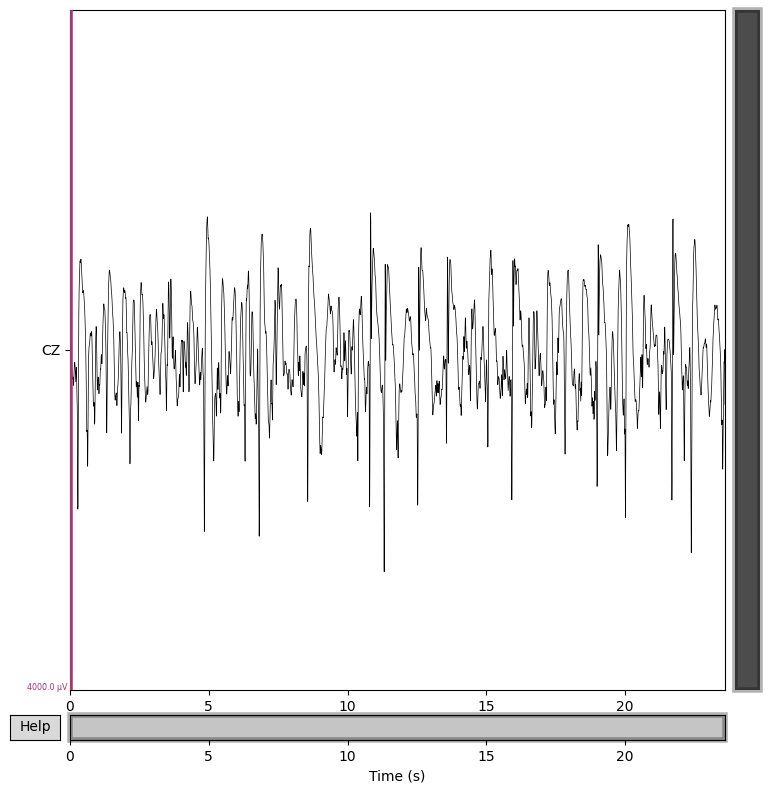

Ictal
Setting up band-pass filter from 0.53 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.53, 40.00 Hz: -6.02, -6.02 dB



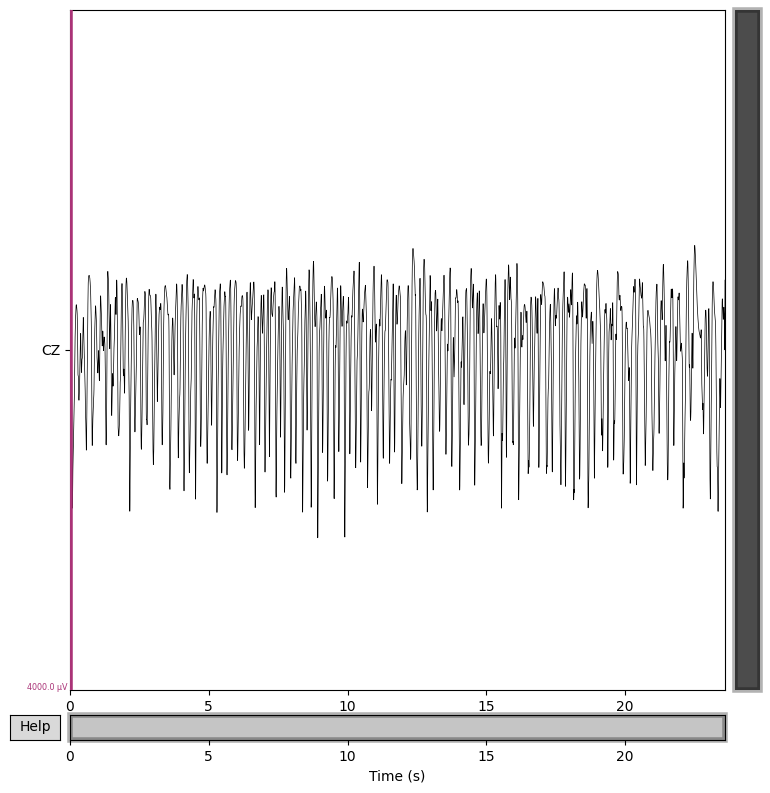

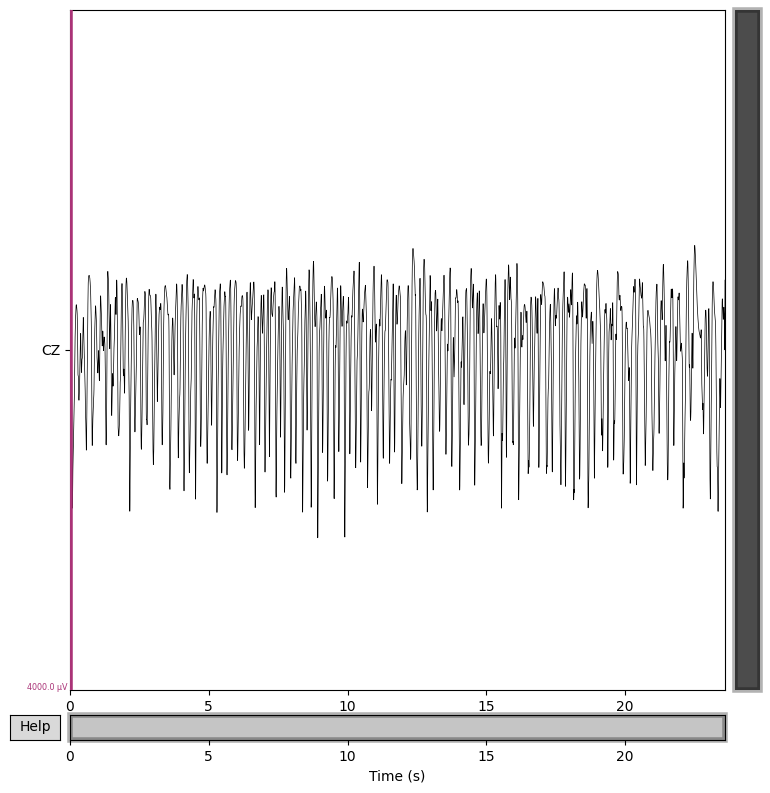

In [46]:
plot_kwargs = {
    'scalings': dict(eeg=20e-4),   # zooms the plot out
    'highpass': 0.53,              # filters out low frequencies
    'lowpass': 40.,                # filters out high frequencies
    'n_channels': 1,               # just plot the one channel
    'duration': 24                 # number of seconds to plot
}

# ANSI escape codes for formatting
underline_bold = '\033[1m\033[4m'
end_format = '\033[0m'

print(underline_bold + "Inter-Ictal" + end_format)
epil_baseline_mne.plot(**plot_kwargs)

print(underline_bold + "Ictal" + end_format)
epil_seizure_mne.plot(**plot_kwargs)

There is a lack of global definition of what "normal" EEG looks like; above represented by the Inter-Ictal data<sup>1</sup>. This is due to EEG changing over the course of a patients life, as well as between levels of cognition (e.g. awake/asleep) or behaviour (e.g. eyes open/closed). A common variation in EEG is found between awake and asleep EEG, where more global waveforms oscillate at slower frequencies across the head. This global activity is inter-dispersed with fast "spikes", which are commonly found in different sleep stages. The variability means EEG alone is rarely sufficient for a clinical diagnosis, with other diagnostic imaging and forms of observation often necessary.

Alike to "normal" EEG, there is a lot of variability found between and within different seizure types. Never-the-less, comparative to pre-seizure background EEG, seizures have the common traits of synchronisation across a few or many EEG channels, a large amplitude, and increased oscillatory activity. Onsets and offsets of seizures are typically abrupt, however variations can occur both between patients as well as between seizures. Patients may also have spiked inter-seizure discharges, which are short bursts of high amplitude, syncronized activity around an epileptic focus<sup>1</sup>.

---

1. Varsavsky2011

2. Niedermeyer1999

Lets now randomly sample 9 files from each folder and plot them to get an idea of how they look.

**Notes**
- I've left it so the random generator picks different ones each time so you can keep running this to see more if you wish.

In [8]:
data = pd.read_csv('/content/F001.txt', header=None, error_bad_lines=False)
print(data.head())  # Display the first few rows of the loaded data

    0
0  34
1  33
2  28
3  22
4  21


<ipython-input-8-3a456280302d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/F001.txt', header=None, error_bad_lines=False)


In [9]:
# Example filtering (adjust as needed)
filtered_data = data  # Modify this line based on your actual filtering process

print(filtered_data.head())  # Display the first few rows of the filtered data

    0
0  34
1  33
2  28
3  22
4  21


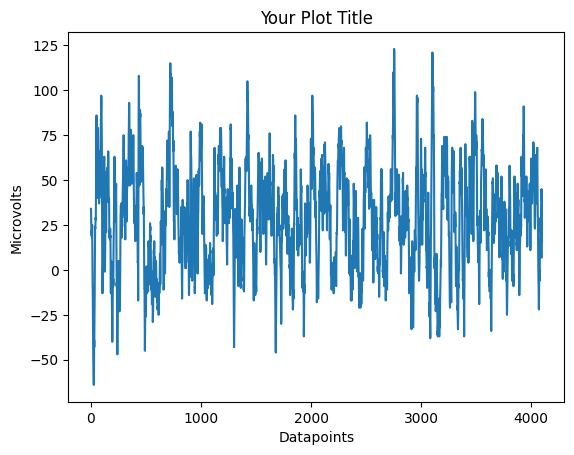

In [10]:
# Example plotting (adjust as needed)
plt.plot(filtered_data)
plt.title('Epileptogenic Zone F001')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

In [13]:
import pandas as pd
import gdown

# Function to load data from Google Drive link
def load_data_from_drive(link):
    file_id = link.split("/")[-2]
    url = f"https://drive.google.com/uc?id={file_id}"
    output = gdown.download(url, quiet=False)
    return pd.read_csv(output, header=None, error_bad_lines=False)

# Google Drive link for F015
link_F015 = "https://drive.google.com/file/d/1UOZ_dr7D0PFVZ00LMRuIyVQl-WGcKD-K/view?usp=sharing"

# Load and display the data for F015
data_F015 = load_data_from_drive(link_F015)
print(data_F015.head())

Downloading...
From: https://drive.google.com/uc?id=1UOZ_dr7D0PFVZ00LMRuIyVQl-WGcKD-K
To: /content/F015.txt
100%|██████████| 16.6k/16.6k [00:00<00:00, 11.3MB/s]

    0
0  48
1  54
2  56
3  64
4  64



<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


In [14]:
# Example filtering for F015 (adjust as needed)
filtered_data_F015 = data_F015  # Modify this line based on your actual filtering process for F015

print(filtered_data_F015.head())  # Display the first few rows of the filtered data for F015

    0
0  48
1  54
2  56
3  64
4  64


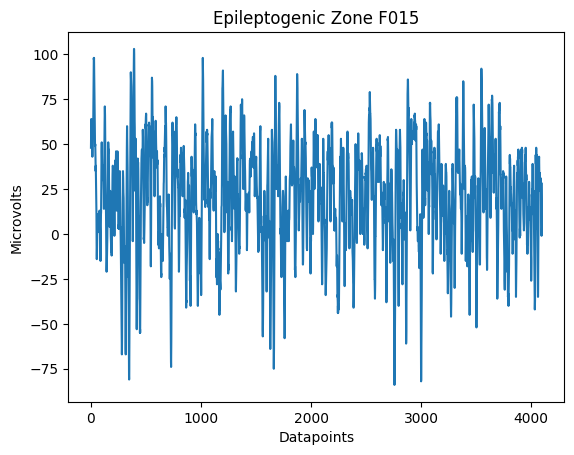

In [16]:
# Example plotting for F015 (adjust as needed)
plt.plot(filtered_data_F015)
plt.title('Epileptogenic Zone F015')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

In [17]:
# Google Drive link for F029
link_F029 = "https://drive.google.com/file/d/1miBza2tdx7gP39XjGugp9mIq8SkiDJic/view?usp=sharing"

# Load and display the data for F029
data_F029 = load_data_from_drive(link_F029)
print(data_F029.head())

# Example filtering for F029 (adjust as needed)
filtered_data_F029 = data_F029  # Modify this line based on your actual filtering process for F029

Downloading...
From: https://drive.google.com/uc?id=1miBza2tdx7gP39XjGugp9mIq8SkiDJic
To: /content/F029.txt
100%|██████████| 19.1k/19.1k [00:00<00:00, 26.8MB/s]

    0
0  27
1  29
2  31
3  30
4  24



<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


Downloading...
From: https://drive.google.com/uc?id=1miBza2tdx7gP39XjGugp9mIq8SkiDJic
To: /content/F029.txt
100%|██████████| 19.1k/19.1k [00:00<00:00, 24.9MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0  27
1  29
2  31
3  30
4  24
    0
0  27
1  29
2  31
3  30
4  24


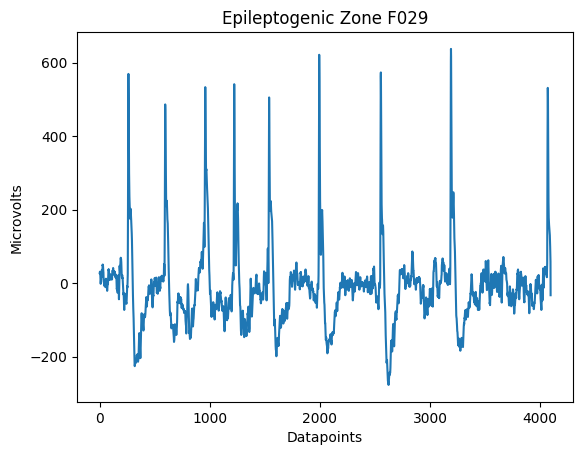

In [18]:
# Google Drive link for F029
link_F029 = "https://drive.google.com/file/d/1miBza2tdx7gP39XjGugp9mIq8SkiDJic/view?usp=sharing"

# Load and display the data for F029
data_F029 = load_data_from_drive(link_F029)
print(data_F029.head())

# Example filtering for F029 (adjust as needed)
filtered_data_F029 = data_F029  # Modify this line based on your actual filtering process for F029

print(filtered_data_F029.head())  # Display the first few rows of the filtered data for F029

# Example plotting for F029 (adjust as needed)
plt.plot(filtered_data_F029)
plt.title('Epileptogenic Zone F029')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1LSo_WsVB7RYqJzEfwQY1pUSqlczJKXmt
To: /content/N001.TXT
100%|██████████| 18.5k/18.5k [00:00<00:00, 27.9MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0 -42
1 -39
2 -35
3 -35
4 -36
    0
0 -42
1 -39
2 -35
3 -35
4 -36


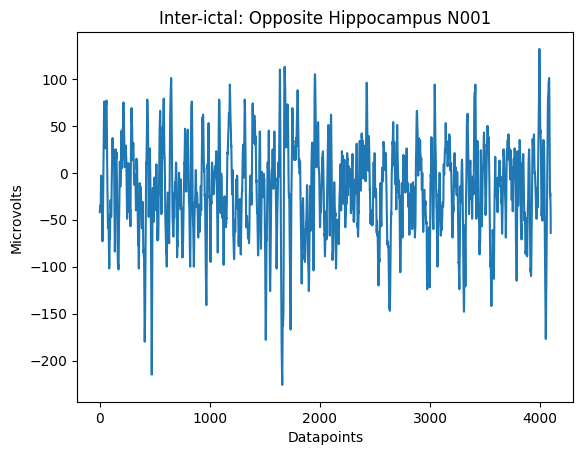

Downloading...
From: https://drive.google.com/uc?id=1sIKBDP6Bj7rUzu31PhRKkfd8AYBsfWg7
To: /content/N015.TXT
100%|██████████| 18.6k/18.6k [00:00<00:00, 13.9MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0 -55
1 -64
2 -91
3 -92
4 -80
    0
0 -55
1 -64
2 -91
3 -92
4 -80


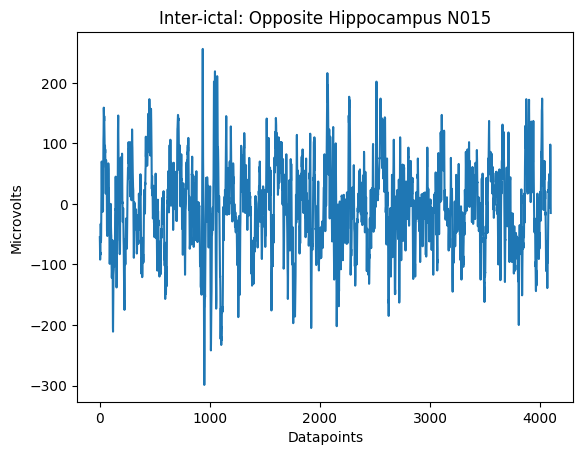

Downloading...
From: https://drive.google.com/uc?id=1VDgz_MaUBncAF9fu3zd34X4eUwVOEaXH
To: /content/N029.TXT
100%|██████████| 17.6k/17.6k [00:00<00:00, 29.4MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0 -37
1 -35
2 -40
3 -31
4 -24
    0
0 -37
1 -35
2 -40
3 -31
4 -24


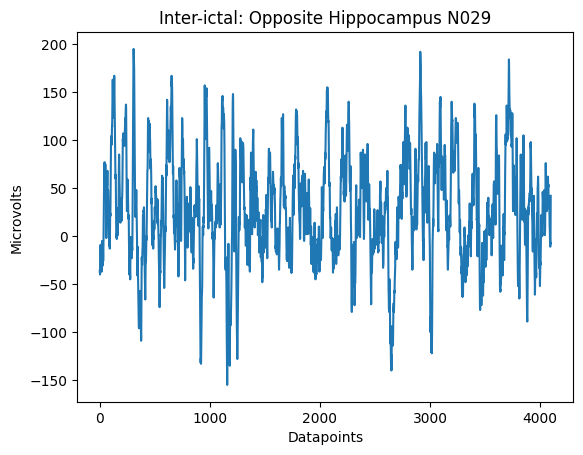

In [19]:
# Google Drive links for N001, N015, N029
link_N001 = "https://drive.google.com/file/d/1LSo_WsVB7RYqJzEfwQY1pUSqlczJKXmt/view?usp=sharing"
link_N015 = "https://drive.google.com/file/d/1sIKBDP6Bj7rUzu31PhRKkfd8AYBsfWg7/view?usp=sharing"
link_N029 = "https://drive.google.com/file/d/1VDgz_MaUBncAF9fu3zd34X4eUwVOEaXH/view?usp=sharing"

# Load and display the data for N001
data_N001 = load_data_from_drive(link_N001)
print(data_N001.head())

# Example filtering for N001 (adjust as needed)
filtered_data_N001 = data_N001  # Modify this line based on your actual filtering process for N001

print(filtered_data_N001.head())  # Display the first few rows of the filtered data for N001

# Example plotting for N001 (adjust as needed)
plt.plot(filtered_data_N001)
plt.title('Inter-ictal: Opposite Hippocampus N001')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for N015
data_N015 = load_data_from_drive(link_N015)
print(data_N015.head())

# Example filtering for N015 (adjust as needed)
filtered_data_N015 = data_N015  # Modify this line based on your actual filtering process for N015

print(filtered_data_N015.head())  # Display the first few rows of the filtered data for N015

# Example plotting for N015 (adjust as needed)
plt.plot(filtered_data_N015)
plt.title('Inter-ictal: Opposite Hippocampus N015')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for N029
data_N029 = load_data_from_drive(link_N029)
print(data_N029.head())

# Example filtering for N029 (adjust as needed)
filtered_data_N029 = data_N029  # Modify this line based on your actual filtering process for N029

print(filtered_data_N029.head())  # Display the first few rows of the filtered data for N029

# Example plotting for N029 (adjust as needed)
plt.plot(filtered_data_N029)
plt.title('Inter-ictal: Opposite Hippocampus N029')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=10J9sSguOKUDNPauh9T-aY3kmCKqhJt9g
To: /content/O001.txt
100%|██████████| 17.9k/17.9k [00:00<00:00, 27.2MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0 -24
1 -22
2 -17
3 -18
4 -19
    0
0 -24
1 -22
2 -17
3 -18
4 -19


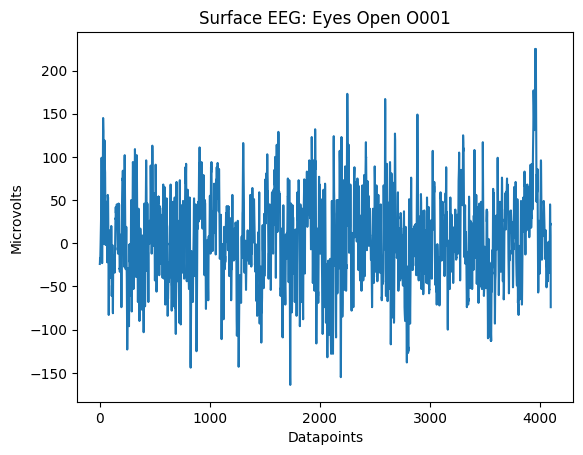

Downloading...
From: https://drive.google.com/uc?id=14xb8OCsrc_AiQXLqadPycMsWjUE9LfHW
To: /content/O015.txt
100%|██████████| 19.3k/19.3k [00:00<00:00, 9.63MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


     0
0  142
1  142
2  138
3  143
4  130
     0
0  142
1  142
2  138
3  143
4  130


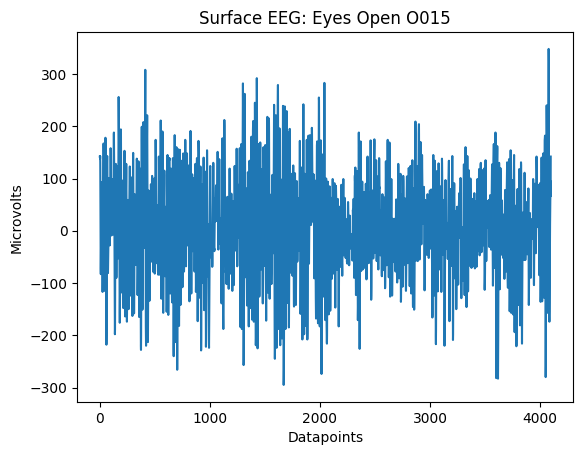

Downloading...
From: https://drive.google.com/uc?id=1lN-Ibf0IenFznx_tSggkymvjuG8pmrwh
To: /content/O029.txt
100%|██████████| 17.6k/17.6k [00:00<00:00, 27.1MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0  -8
1 -13
2 -24
3 -44
4 -56
    0
0  -8
1 -13
2 -24
3 -44
4 -56


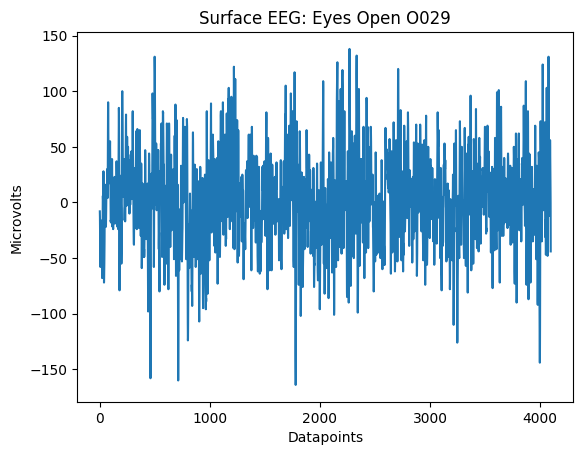

In [20]:
# Google Drive links for O001, O015, O029
link_O001 = "https://drive.google.com/file/d/10J9sSguOKUDNPauh9T-aY3kmCKqhJt9g/view?usp=sharing"
link_O015 = "https://drive.google.com/file/d/14xb8OCsrc_AiQXLqadPycMsWjUE9LfHW/view?usp=sharing"
link_O029 = "https://drive.google.com/file/d/1lN-Ibf0IenFznx_tSggkymvjuG8pmrwh/view?usp=sharing"

# Load and display the data for O001
data_O001 = load_data_from_drive(link_O001)
print(data_O001.head())

# Example filtering for O001 (adjust as needed)
filtered_data_O001 = data_O001  # Modify this line based on your actual filtering process for O001

print(filtered_data_O001.head())  # Display the first few rows of the filtered data for O001

# Example plotting for O001 (adjust as needed)
plt.plot(filtered_data_O001)
plt.title('Surface EEG: Eyes Open O001')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for O015
data_O015 = load_data_from_drive(link_O015)
print(data_O015.head())

# Example filtering for O015 (adjust as needed)
filtered_data_O015 = data_O015  # Modify this line based on your actual filtering process for O015

print(filtered_data_O015.head())  # Display the first few rows of the filtered data for O015

# Example plotting for O015 (adjust as needed)
plt.plot(filtered_data_O015)
plt.title('Surface EEG: Eyes Open O015')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for O029
data_O029 = load_data_from_drive(link_O029)
print(data_O029.head())

# Example filtering for O029 (adjust as needed)
filtered_data_O029 = data_O029  # Modify this line based on your actual filtering process for O029

print(filtered_data_O029.head())  # Display the first few rows of the filtered data for O029

# Example plotting for O029 (adjust as needed)
plt.plot(filtered_data_O029)
plt.title('Surface EEG: Eyes Open O029')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1NgZqsZwDpAButjKfWv1dpyRAFIV78OZA
To: /content/S001.txt
100%|██████████| 21.4k/21.4k [00:00<00:00, 32.3MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


     0
0  100
1  124
2  153
3  185
4  210
     0
0  100
1  124
2  153
3  185
4  210


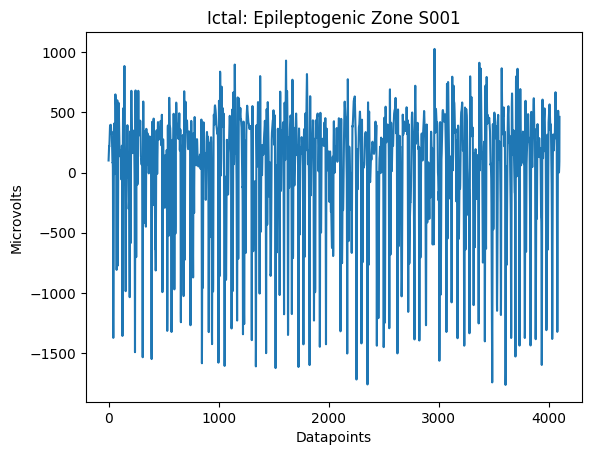

Downloading...
From: https://drive.google.com/uc?id=16Dat4tcMuJIHXkgJdNt-f_X48dbfctzV
To: /content/S015.txt
100%|██████████| 21.3k/21.3k [00:00<00:00, 33.3MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


     0
0 -174
1 -392
2 -470
3 -398
4 -259
     0
0 -174
1 -392
2 -470
3 -398
4 -259


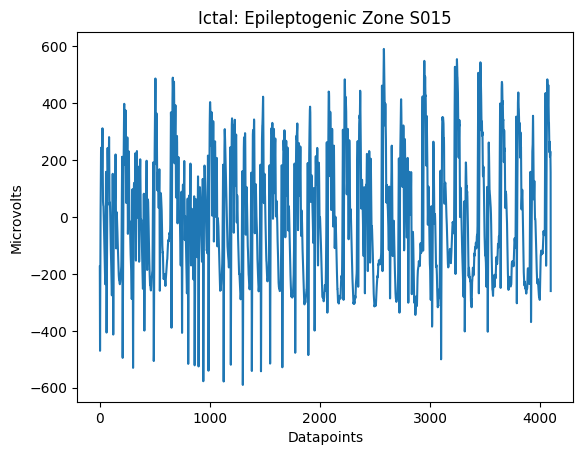

Downloading...
From: https://drive.google.com/uc?id=1NC9NBi-D7XlKZuZO3BdspoZYDpBfgLru
To: /content/S029.txt
100%|██████████| 21.4k/21.4k [00:00<00:00, 30.2MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0  59
1  37
2  25
3  18
4  16
    0
0  59
1  37
2  25
3  18
4  16


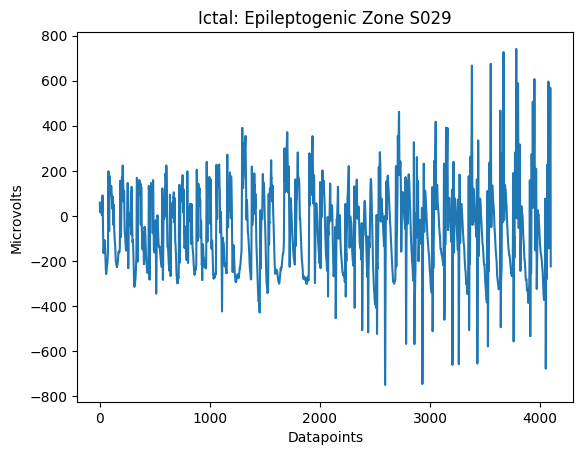

In [21]:
# Google Drive links for S001, S015, S029
link_S001 = "https://drive.google.com/file/d/1NgZqsZwDpAButjKfWv1dpyRAFIV78OZA/view?usp=sharing"
link_S015 = "https://drive.google.com/file/d/16Dat4tcMuJIHXkgJdNt-f_X48dbfctzV/view?usp=sharing"
link_S029 = "https://drive.google.com/file/d/1NC9NBi-D7XlKZuZO3BdspoZYDpBfgLru/view?usp=sharing"

# Load and display the data for S001
data_S001 = load_data_from_drive(link_S001)
print(data_S001.head())

# Example filtering for S001 (adjust as needed)
filtered_data_S001 = data_S001  # Modify this line based on your actual filtering process for S001

print(filtered_data_S001.head())  # Display the first few rows of the filtered data for S001

# Example plotting for S001 (adjust as needed)
plt.plot(filtered_data_S001)
plt.title('Ictal: Epileptogenic Zone S001')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for S015
data_S015 = load_data_from_drive(link_S015)
print(data_S015.head())

# Example filtering for S015 (adjust as needed)
filtered_data_S015 = data_S015  # Modify this line based on your actual filtering process for S015

print(filtered_data_S015.head())  # Display the first few rows of the filtered data for S015

# Example plotting for S015 (adjust as needed)
plt.plot(filtered_data_S015)
plt.title('Ictal: Epileptogenic Zone S015')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for S029
data_S029 = load_data_from_drive(link_S029)
print(data_S029.head())

# Example filtering for S029 (adjust as needed)
filtered_data_S029 = data_S029  # Modify this line based on your actual filtering process for S029

print(filtered_data_S029.head())  # Display the first few rows of the filtered data for S029

# Example plotting for S029 (adjust as needed)
plt.plot(filtered_data_S029)
plt.title('Ictal: Epileptogenic Zone S029')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1IKckqfBGC1OIrrBNsmTvAk8yq_0XCVVR
To: /content/Z001.txt
100%|██████████| 17.4k/17.4k [00:00<00:00, 26.3MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0  12
1  22
2  35
3  45
4  69
    0
0  12
1  22
2  35
3  45
4  69


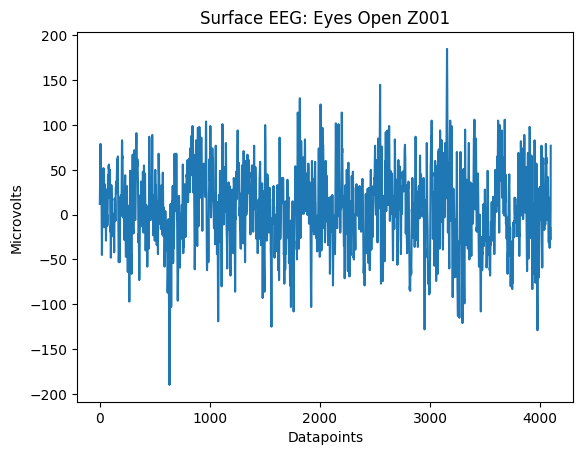

Downloading...
From: https://drive.google.com/uc?id=1KV4KRHo5iHPtF8id7BxwlbiselbacmbA
To: /content/Z015.txt
100%|██████████| 17.5k/17.5k [00:00<00:00, 8.86MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0  30
1  19
2  -3
3 -14
4 -12
    0
0  30
1  19
2  -3
3 -14
4 -12


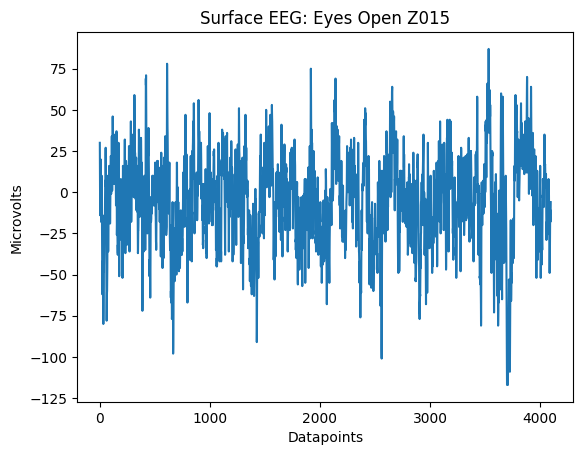

Downloading...
From: https://drive.google.com/uc?id=1Gg4PxcIvUmNFU9r7j0bPQpXFKxiGjtQZ
To: /content/Z029.txt
100%|██████████| 17.7k/17.7k [00:00<00:00, 31.1MB/s]
<ipython-input-13-be2d49e4acb9>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(output, header=None, error_bad_lines=False)


    0
0 -42
1 -49
2 -37
3 -12
4   0
    0
0 -42
1 -49
2 -37
3 -12
4   0


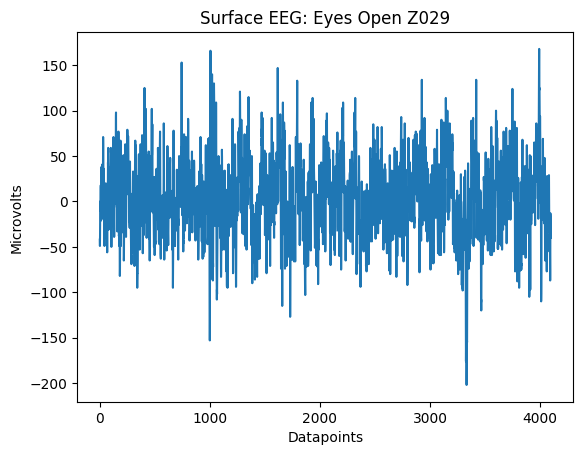

In [22]:
# Google Drive links for Z001, Z015, Z029
link_Z001 = "https://drive.google.com/file/d/1IKckqfBGC1OIrrBNsmTvAk8yq_0XCVVR/view?usp=sharing"
link_Z015 = "https://drive.google.com/file/d/1KV4KRHo5iHPtF8id7BxwlbiselbacmbA/view?usp=sharing"
link_Z029 = "https://drive.google.com/file/d/1Gg4PxcIvUmNFU9r7j0bPQpXFKxiGjtQZ/view?usp=sharing"

# Load and display the data for Z001
data_Z001 = load_data_from_drive(link_Z001)
print(data_Z001.head())

# Example filtering for Z001 (adjust as needed)
filtered_data_Z001 = data_Z001  # Modify this line based on your actual filtering process for Z001

print(filtered_data_Z001.head())  # Display the first few rows of the filtered data for Z001

# Example plotting for Z001 (adjust as needed)
plt.plot(filtered_data_Z001)
plt.title('Surface EEG: Eyes Open Z001')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for Z015
data_Z015 = load_data_from_drive(link_Z015)
print(data_Z015.head())

# Example filtering for Z015 (adjust as needed)
filtered_data_Z015 = data_Z015  # Modify this line based on your actual filtering process for Z015

print(filtered_data_Z015.head())  # Display the first few rows of the filtered data for Z015

# Example plotting for Z015 (adjust as needed)
plt.plot(filtered_data_Z015)
plt.title('Surface EEG: Eyes Open Z015')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

# Load and display the data for Z029
data_Z029 = load_data_from_drive(link_Z029)
print(data_Z029.head())

# Example filtering for Z029 (adjust as needed)
filtered_data_Z029 = data_Z029  # Modify this line based on your actual filtering process for Z029

print(filtered_data_Z029.head())  # Display the first few rows of the filtered data for Z029

# Example plotting for Z029 (adjust as needed)
plt.plot(filtered_data_Z029)
plt.title('Surface EEG: Eyes Open Z029')
plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.show()

In [53]:
import gdown
import zipfile
import os

# Define directory for extracted data
extracted_data_dir = 'extracted_data'
os.makedirs(extracted_data_dir, exist_ok=True)

# Download and extract zip files
zip_links = {
    'f.zip': 'https://drive.google.com/uc?id=1pCMlCfN48je7DePNUoi3X0D3AJurdVwl',
    's.zip': 'https://drive.google.com/uc?id=1_oa9eJTdx_wWZn6mpWj8jSekCNGxrYfb',
    'n.zip': 'https://drive.google.com/uc?id=1xH7WZ_eizXvFe_U1XJOdc8YE4Z0qdYp-',
    'o.zip': 'https://drive.google.com/uc?id=1ItJ8e9zuhKdX09SPpneIwjJmbZwjMyud',
    'z.zip': 'https://drive.google.com/uc?id=112ALlPbt3wqMkcPYhccb66qlw_6XFFSF'
}

for zip_file, link in zip_links.items():
    # Download zip file
    gdown.download(link, zip_file, quiet=False)

    # Extract zip file
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extracted_data_dir)

Downloading...
From: https://drive.google.com/uc?id=1pCMlCfN48je7DePNUoi3X0D3AJurdVwl
To: /content/f.zip
100%|██████████| 597k/597k [00:00<00:00, 46.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_oa9eJTdx_wWZn6mpWj8jSekCNGxrYfb
To: /content/s.zip
100%|██████████| 787k/787k [00:00<00:00, 73.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xH7WZ_eizXvFe_U1XJOdc8YE4Z0qdYp-
To: /content/n.zip
100%|██████████| 587k/587k [00:00<00:00, 28.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ItJ8e9zuhKdX09SPpneIwjJmbZwjMyud
To: /content/o.zip
100%|██████████| 642k/642k [00:00<00:00, 83.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=112ALlPbt3wqMkcPYhccb66qlw_6XFFSF
To: /content/z.zip
100%|██████████| 591k/591k [00:00<00:00, 52.0MB/s]


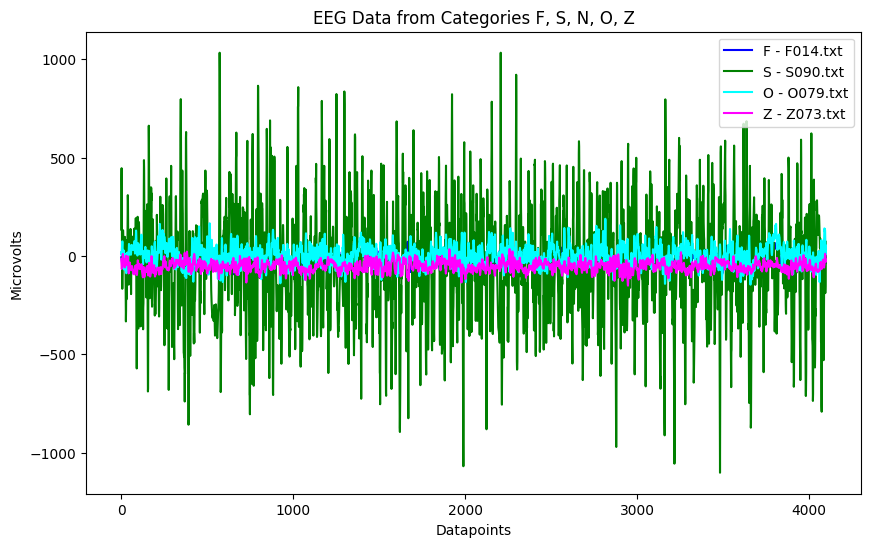

In [58]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

# Extract the zip files
zip_files = ['f.zip', 's.zip', 'n.zip', 'o.zip', 'z.zip']
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall()

# Define categories and colors for plotting
categories = ['F', 'S', 'N', 'O', 'Z']
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
plt.figure(figsize=(10, 6))

# Iterate through each category and randomly select 2 files
for category, color in zip(categories, colors):
    folder_path = os.path.join(category)
    files = os.listdir(folder_path)
    selected_files = random.sample(files, 1)  # Randomly select files

    for file in selected_files:
        if file.endswith('.txt'):
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, header=None, sep='\t')
            plt.plot(data, color=color, label=f'{category} - {file}')

plt.xlabel('Datapoints')
plt.ylabel('Microvolts')
plt.title('EEG Data from Categories F, S, N, O, Z')
plt.legend()
plt.show()

NORMALIZATION

In [23]:
# Function to normalize data
def normalize_data(data):
    return (data - data.mean()) / data.std()

# Apply normalization for all datasets
normalized_data_Z001 = normalize_data(filtered_data_Z001)
print("Normalized Data for Z001:")
print(normalized_data_Z001.head())

normalized_data_Z015 = normalize_data(filtered_data_Z015)
print("Normalized Data for Z015:")
print(normalized_data_Z015.head())

normalized_data_Z029 = normalize_data(filtered_data_Z029)
print("Normalized Data for Z029:")
print(normalized_data_Z029.head())

normalized_data_S029 = normalize_data(filtered_data_S029)
print("Normalized Data for S029:")
print(normalized_data_S029.head())

normalized_data_S015 = normalize_data(filtered_data_S015)
print("Normalized Data for S015:")
print(normalized_data_S015.head())

normalized_data_S001 = normalize_data(filtered_data_S001)
print("Normalized Data for S001:")
print(normalized_data_S001.head())

normalized_data_O029 = normalize_data(filtered_data_O029)
print("Normalized Data for O029:")
print(normalized_data_O029.head())

normalized_data_O015 = normalize_data(filtered_data_O015)
print("Normalized Data for O015:")
print(normalized_data_O015.head())

normalized_data_O001 = normalize_data(filtered_data_O001)
print("Normalized Data for O001:")
print(normalized_data_O001.head())

normalized_data_N029 = normalize_data(filtered_data_N029)
print("Normalized Data for N029:")
print(normalized_data_N029.head())

normalized_data_N015 = normalize_data(filtered_data_N015)
print("Normalized Data for N015:")
print(normalized_data_N015.head())

normalized_data_N001 = normalize_data(filtered_data_N001)
print("Normalized Data for N001:")
print(normalized_data_N001.head())

normalized_data_F029 = normalize_data(filtered_data_F029)
print("Normalized Data for F029:")
print(normalized_data_F029.head())

normalized_data_F015 = normalize_data(filtered_data_F015)
print("Normalized Data for F015:")
print(normalized_data_F015.head())

normalized_data = normalize_data(filtered_data)
print("Normalized Data for F001:")
print(normalized_data.head())

Normalized Data for Z001:
          0
0  0.121691
1  0.356455
2  0.661649
3  0.896413
4  1.459847
Normalized Data for Z015:
          0
0  1.286087
1  0.885603
2  0.084634
3 -0.315850
4 -0.243035
Normalized Data for Z029:
          0
0 -1.040646
1 -1.205152
2 -0.923141
3 -0.335616
4 -0.053604
Normalized Data for S029:
          0
0  0.665644
1  0.545094
2  0.479340
3  0.440983
4  0.430024
Normalized Data for S015:
          0
0 -0.788174
1 -1.808934
2 -2.174160
3 -1.837028
4 -1.186176
Normalized Data for S001:
          0
0  0.110544
1  0.160696
2  0.221296
3  0.288166
4  0.340408
Normalized Data for O029:
          0
0 -0.263334
1 -0.384420
2 -0.650810
3 -1.135154
4 -1.425761
Normalized Data for O015:
          0
0  1.405452
1  1.405452
2  1.364057
3  1.415800
4  1.281268
Normalized Data for O001:
          0
0 -0.576943
1 -0.537368
2 -0.438430
3 -0.458218
4 -0.478005
Normalized Data for N029:
          0
0 -1.185598
1 -1.149436
2 -1.239840
3 -1.077112
4 -0.950546
Normalized Data for 

In [34]:
import numpy as np

# Function to normalize data
def normalize_data(data):
    return (data - data.mean()) / data.std()

# Apply normalization for all datasets
normalized_data_Z001 = normalize_data(filtered_data_Z001)
normalized_data_Z015 = normalize_data(filtered_data_Z015)
normalized_data_Z029 = normalize_data(filtered_data_Z029)
normalized_data_S029 = normalize_data(filtered_data_S029)
normalized_data_S015 = normalize_data(filtered_data_S015)
normalized_data_S001 = normalize_data(filtered_data_S001)
normalized_data_O029 = normalize_data(filtered_data_O029)
normalized_data_O015 = normalize_data(filtered_data_O015)
normalized_data_O001 = normalize_data(filtered_data_O001)
normalized_data_N029 = normalize_data(filtered_data_N029)
normalized_data_N015 = normalize_data(filtered_data_N015)
normalized_data_N001 = normalize_data(filtered_data_N001)
normalized_data_F029 = normalize_data(filtered_data_F029)
normalized_data_F015 = normalize_data(filtered_data_F015)
normalized_data = normalize_data(filtered_data)

def extract_features(data):
    # Apply FFT and get absolute values to obtain magnitudes
    fft_values = np.abs(np.fft.rfft(data))
    return fft_values

# Extract features for Z datasets
features_Z001 = extract_features(normalized_data_Z001)
features_Z015 = extract_features(normalized_data_Z015)
features_Z029 = extract_features(normalized_data_Z029)

# Print features for Z datasets
print("Features for Z001:\n", features_Z001)
print("\nFeatures for Z015:\n", features_Z015)
print("\nFeatures for Z029:\n", features_Z029)

# Extract features for F datasets
features_F001 = extract_features(normalized_data)
features_F015 = extract_features(normalized_data_F015)
features_F029 = extract_features(normalized_data_F029)

# Print features for F datasets
print("\nFeatures for F001:\n", features_F001)
print("\nFeatures for F015:\n", features_F015)
print("\nFeatures for F029:\n", features_F029)

# Extract features for S datasets
features_S001 = extract_features(normalized_data_S001)
features_S015 = extract_features(normalized_data_S015)
features_S029 = extract_features(normalized_data_S029)

# Print features for S datasets
print("\nFeatures for S001:\n", features_S001)
print("\nFeatures for S015:\n", features_S015)
print("\nFeatures for S029:\n", features_S029)

# Extract features for O datasets
features_O001 = extract_features(normalized_data_O001)
features_O015 = extract_features(normalized_data_O015)
features_O029 = extract_features(normalized_data_O029)

# Print features for O datasets
print("\nFeatures for O001:\n", features_O001)
print("\nFeatures for O015:\n", features_O015)
print("\nFeatures for O029:\n", features_O029)

# Extract features for N datasets
features_N001 = extract_features(normalized_data_N001)
features_N015 = extract_features(normalized_data_N015)
features_N029 = extract_features(normalized_data_N029)

# Print features for N datasets
print("\nFeatures for N001:\n", features_N001)
print("\nFeatures for N015:\n", features_N015)
print("\nFeatures for N029:\n", features_N029)

Features for Z001:
 [[0.1216912 ]
 [0.35645546]
 [0.66164899]
 ...
 [0.41826659]
 [0.0277855 ]
 [1.64765887]]

Features for Z015:
 [[1.28608727]
 [0.88560294]
 [0.08463427]
 ...
 [0.20662706]
 [0.27944239]
 [0.02458873]]

Features for Z029:
 [[1.0406456 ]
 [1.20515249]
 [0.92314068]
 ...
 [0.42962001]
 [0.50012297]
 [0.99364363]]

Features for F001:
 [[0.62265408]
 [0.72181196]
 [0.82044875]
 ...
 [1.77750716]
 [1.18578483]
 [0.24814153]]

Features for F015:
 [[0.91898801]
 [1.12216797]
 [1.18989462]
 ...
 [0.6725883 ]
 [0.57099833]
 [0.2417215 ]]

Features for F029:
 [[0.38656514]
 [0.40581797]
 [0.4250708 ]
 ...
 [0.8197539 ]
 [0.68498406]
 [0.19101988]]

Features for S001:
 [[0.11054367]
 [0.16069588]
 [0.22129646]
 ...
 [0.02068763]
 [0.10009529]
 [0.86700612]]

Features for S015:
 [[0.78817357]
 [1.80893387]
 [2.17416003]
 ...
 [0.90216803]
 [0.76169643]
 [1.19085882]]

Features for S029:
 [[0.66564437]
 [0.54509449]
 [0.47934002]
 ...
 [2.34786304]
 [1.43277992]
 [0.88506536]]

F

In [36]:
import numpy as np

# Example labeling
labels_Z001 = np.zeros(len(features_Z001))
labels_Z015 = np.zeros(len(features_Z015))
labels_Z029 = np.ones(len(features_Z029))  # Assuming Z029 is seizure data

# Labeling for F datasets
labels_F001 = np.zeros(len(features_F001))
labels_F015 = np.zeros(len(features_F015))
labels_F029 = np.zeros(len(features_F029))

# Labeling for S datasets
labels_S001 = np.zeros(len(features_S001))
labels_S015 = np.zeros(len(features_S015))
labels_S029 = np.ones(len(features_S029))  # Assuming S029 is seizure data

# Labeling for O datasets
labels_O001 = np.zeros(len(features_O001))
labels_O015 = np.zeros(len(features_O015))
labels_O029 = np.ones(len(features_O029))  # Assuming O029 is seizure data

# Labeling for N datasets
labels_N001 = np.zeros(len(features_N001))
labels_N015 = np.zeros(len(features_N015))
labels_N029 = np.ones(len(features_N029))  # Assuming N029 is seizure data

# Labeling for F datasets
labels_F001 = np.zeros(len(features_F001))
labels_F015 = np.zeros(len(features_F015))
labels_F029 = np.zeros(len(features_F029))

# Combine all labels and features
all_labels = np.concatenate([
    labels_Z001, labels_Z015, labels_Z029,
    labels_F001, labels_F015, labels_F029,
    labels_S001, labels_S015, labels_S029,
    labels_O001, labels_O015, labels_O029,
    labels_N001, labels_N015, labels_N029
])

all_features = np.concatenate([
    features_Z001, features_Z015, features_Z029,
    features_F001, features_F015, features_F029,
    features_S001, features_S015, features_S029,
    features_O001, features_O015, features_O029,
    features_N001, features_N015, features_N029
])

# Shuffle the data
shuffle_indices = np.random.permutation(len(all_labels))
all_labels = all_labels[shuffle_indices]
all_features = all_features[shuffle_indices]

# Print the output
print("Shuffled Labels:\n", all_labels)
print("\nShuffled Features:\n", all_features)

Shuffled Labels:
 [0. 0. 0. ... 0. 0. 0.]

Shuffled Features:
 [[0.15790714]
 [0.03525961]
 [0.94223443]
 ...
 [1.76124182]
 [1.17842884]
 [0.93474795]]


DATA **SPLITTING**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
from io import StringIO
import numpy as np

# List of file prefixes (Z, F, S, O, N) and their corresponding lengths
file_prefixes = ['Z', 'F', 'S', 'O', 'N']
file_lengths = [3, 3, 3, 3, 3]

# Function to load data from a URL based on the file prefix
def load_data(prefix):
    data_url = f"https://example.com/{prefix}.txt"  # Adjust the URL pattern
    response = requests.get(data_url)
    data_txt = response.text
    return pd.read_csv(StringIO(data_txt), delimiter='\t')  # Adjust delimiter if needed

# Load data for each prefix and concatenate them
all_features = np.concatenate([load_data(prefix).to_numpy() for prefix in file_prefixes])

# Create labels based on the lengths of each dataset
all_labels = np.concatenate([np.zeros(length) if 'F' in prefix else np.ones(length) for prefix, length in zip(file_prefixes, file_lengths)])

# Shuffle the data
shuffle_indices = np.random.permutation(len(all_labels))
all_labels = all_labels[shuffle_indices]
all_features = all_features[shuffle_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets for verification
print("Training set - Features:", X_train.shape, " Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Labels:", y_test.shape)

Training set - Features: (12, 1)  Labels: (12,)
Testing set - Features: (3, 1)  Labels: (3,)


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import zipfile
import os
import pandas as pd

base_path = '/content/gdrive/My Drive/Epileptologie Database'  # Adjust the path based on your Google Drive folder structure
data = []

for folder_name in ['F', 'S', 'N', 'O', 'Z']:
    zip_path = f'{base_path}/{folder_name.lower()}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/tmp_data')

    extracted_folder = f'/content/tmp_data/{folder_name}'
    for filename in os.listdir(extracted_folder):
        file_path = os.path.join(extracted_folder, filename)
        if os.path.isfile(file_path):
            # Assuming the data is tab-separated, adjust as needed
            df = pd.read_csv(file_path, sep='\t', header=None)
            data.append(df.values.flatten())  # Flatten and store

            # Save the CSV file
            csv_save_path = f'C:\\Users\\Hrishik Parmar\\OneDrive\\Desktop\\Epileptologie Database\\CSV\\{folder_name}_{filename}.csv'
            df.to_csv(csv_save_path, index=False)
            print(r"CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV")

CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\Epileptologie Database\CSV
CSV saved: C:\Users\Hrishik Parmar\OneDrive\Desktop\

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have loaded your data into the 'data' variable and created labels
# Create labels (assuming equal distribution of classes)
labels = np.array([i // 100 for i in range(500)])  # Adjust as per your labeling

# Convert list to numpy array
data = np.array(data)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets for verification
print("Training set - Features:", X_train.shape, " Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Labels:", y_test.shape)

Training set - Features: (400, 4097)  Labels: (400,)
Testing set - Features: (100, 4097)  Labels: (100,)


Accuracy: 0.47


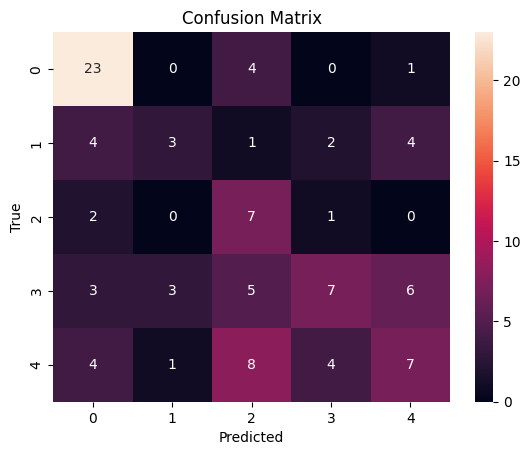

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.4496710526315789


In [21]:
from sklearn.metrics import classification_report

# Assuming you have already predicted labels (y_pred) and true labels (y_test)
# If not, replace y_pred and y_test with your actual predictions and true labels

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        28
           1       0.43      0.21      0.29        14
           2       0.28      0.70      0.40        10
           3       0.50      0.29      0.37        24
           4       0.39      0.29      0.33        24

    accuracy                           0.47       100
   macro avg       0.45      0.46      0.42       100
weighted avg       0.48      0.47      0.45       100



**MULTICLASS CLASSIFICATION TASK**

In [46]:
import gdown
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Download and extract zip files
zip_links = {
    'f.zip': 'https://drive.google.com/uc?id=1pCMlCfN48je7DePNUoi3X0D3AJurdVwl',
    's.zip': 'https://drive.google.com/uc?id=1_oa9eJTdx_wWZn6mpWj8jSekCNGxrYfb',
    'n.zip': 'https://drive.google.com/uc?id=1xH7WZ_eizXvFe_U1XJOdc8YE4Z0qdYp-',
    'o.zip': 'https://drive.google.com/uc?id=1ItJ8e9zuhKdX09SPpneIwjJmbZwjMyud',
    'z.zip': 'https://drive.google.com/uc?id=112ALlPbt3wqMkcPYhccb66qlw_6XFFSF'
}
for zip_file, link in zip_links.items():
    gdown.download(link, zip_file, quiet=False)
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('data_folder')

# Load and preprocess data
data, labels = [], []
categories = ['F', 'S', 'N', 'O', 'Z']
for i, category in enumerate(categories):
    files = os.listdir(os.path.join('data_folder', category))
    for file in files:
        df = pd.read_csv(os.path.join('data_folder', category, file), header=None)
        data.append(df.values.flatten())
        labels.append(i)

# Convert to numpy arrays and split data
X, y = np.array(data), np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multi-class classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Downloading...
From: https://drive.google.com/uc?id=1pCMlCfN48je7DePNUoi3X0D3AJurdVwl
To: /content/f.zip
100%|██████████| 597k/597k [00:00<00:00, 32.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_oa9eJTdx_wWZn6mpWj8jSekCNGxrYfb
To: /content/s.zip
100%|██████████| 787k/787k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xH7WZ_eizXvFe_U1XJOdc8YE4Z0qdYp-
To: /content/n.zip
100%|██████████| 587k/587k [00:00<00:00, 94.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ItJ8e9zuhKdX09SPpneIwjJmbZwjMyud
To: /content/o.zip
100%|██████████| 642k/642k [00:00<00:00, 92.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=112ALlPbt3wqMkcPYhccb66qlw_6XFFSF
To: /content/z.zip
100%|██████████| 591k/591k [00:00<00:00, 40.2MB/s]


              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       1.00      1.00      1.00        14
           2       0.31      1.00      0.48        10
           3       0.75      0.38      0.50        24
           4       0.54      0.58      0.56        24

    accuracy                           0.60       100
   macro avg       0.68      0.68      0.63       100
weighted avg       0.71      0.60      0.61       100



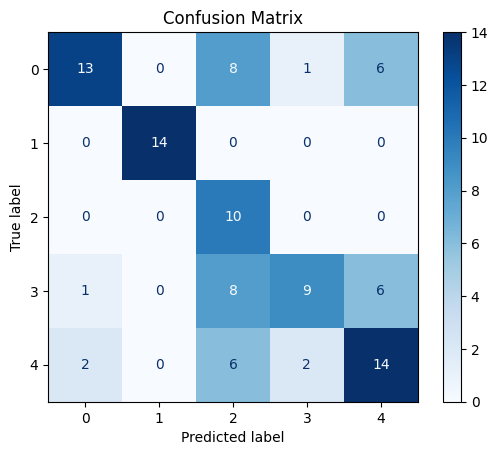

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# For a more detailed report, you would typically display the classification report as text
# However, if you want a visual representation, you would have to convert the report to a DataFrame
# and plot it. This part is a bit more complex and not typically done due to the format of the report.